## <Centre>EV Market Segmentation

This project presents a comprehensive analysis of the electric vehicle (EV) market in India, with a focus on segmentation derived from sales data, customer feedback, and technical specifications.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import warnings

In [2]:
warnings.filterwarnings("ignore")
pd.options.display.max_columns = None

## Sales Data

Sales data spanning from 2017 to 2024 for electric vehicles has been obtained from the Society of Manufacturers of Electric Vehicles. This dataset includes sales numbers for electric two-wheelers, three-wheelers, four-wheelers, and buses, providing a comprehensive view of market trends and consumer preferences over the specified timeframe.

In [3]:
data_e4w = pd.read_excel("2w_data.xlsx", sheet_name=None)

In [4]:
data_e4w.keys()


dict_keys(['EV 2W FY 19-20', 'EV 2W FY 20-21', 'EV 2W FY 21-22', 'EV 2W FY 22-23', 'EV 2W FY 23-24', 'EV Market', 'Electric Bus Sales', 'Electric 4-Wheeler Sales', 'Electric 3-Wheeler Sales', 'EV Industries', 'Electric 2-Wheeler Sales'])

In [5]:
data_e4w['EV Industries']

,category,financial_year,num_vehicles
0,E-2 Wheelers,2017-18,1981
1,E-2 Wheelers,2018-19,27478
2,E-2 Wheelers,2019-20,26512
3,E-2 Wheelers,2020-21,44294
4,E-2 Wheelers,2021-22,249615
5,E-2 Wheelers,2022-23,728090
6,E-2 Wheelers,2023-24,944126
7,E-3 Wheelers,2017-18,91970
8,E-3 Wheelers,2018-19,116031
9,E-3 Wheelers,2019-20,143051


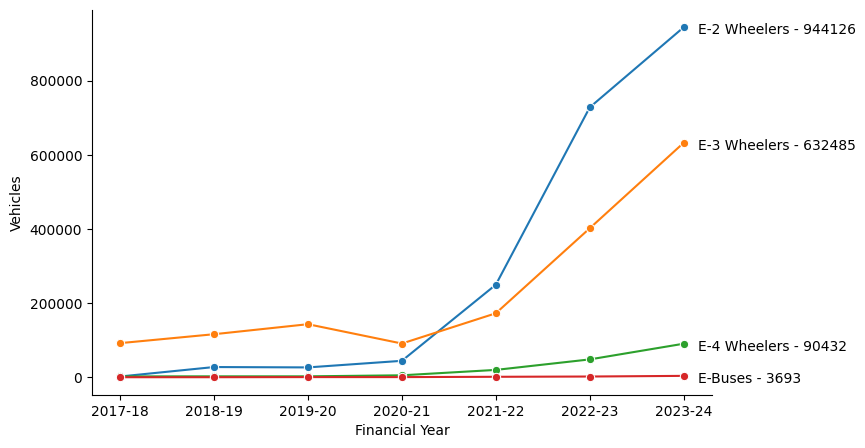

In [6]:
fig, ax = plt.subplots(figsize=(8, 5))
ax = sns.lineplot(data=data_e4w['EV Industries'], x='financial_year', y='num_vehicles', hue='category', marker='o', palette='tab10')
plt.xlabel("Financial Year")
plt.ylabel("Vehicles")
plt.legend(title='Category')

# Annotate the last data point
for col in data_e4w['EV Industries']['category'].unique():
    last_point = data_e4w['EV Industries'][data_e4w['EV Industries']['category'] == col].iloc[-1]
    plt.annotate(f"{last_point['category']} - {last_point['num_vehicles']}", 
                 (last_point['financial_year'], last_point['num_vehicles']),
                 textcoords="offset points",
                 xytext=(10, -5), 
                 ha='left')
ax.spines[['right', 'top']].set_visible(False)
ax.get_legend().set_visible(False)
plt.show()

*In 2024, India's **four-wheeler electric vehicle market** continues to assert its dominance within the industry, boasting a substantial recorded sale of **90,432 units**. This figure underscores the significant growth and adoption of electric four-wheelers in the country, reflecting a burgeoning interest and confidence among consumers in this segment. As electric mobility gains traction, the four-wheeler segment stands out as a key driver of the EV market, offering consumers a viable and sustainable alternative to traditional gasoline-powered vehicles. With its robust sales performance, the electric four-wheeler segment in India reaffirms its position as a pivotal player in the ongoing transition towards cleaner and greener transportation solutions.*

In [7]:
data_e4w['EV Market'] = data_e4w['EV Market'].sort_values(by='Amount INR Cr', ascending = False)

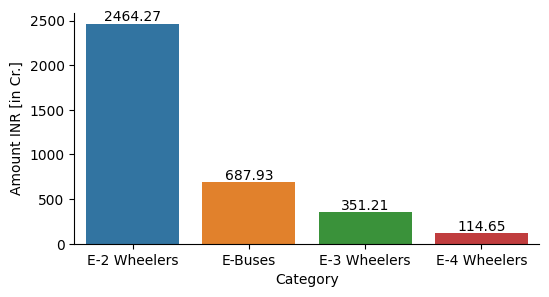

In [8]:
fig, ax = plt.subplots(figsize = (6, 3))
ax = sns.barplot(data_e4w['EV Market'], x = 'Category', y = 'Amount INR Cr')
ax.bar_label(ax.containers[0])
plt.ylabel("Amount INR [in Cr.]")
ax.spines[['right', 'top']].set_visible(False)

*The financial aspect of the electric vehicle market in India is depicted in the above figure, highlighting the industry's total value in crores. Among the various segments, **four-wheelers accounted for a revenue of 114.65 crores**, as per the Society of Manufacturers of Electric Vehicles 2022 report.*

## EV Market Segmentation

*This dataset is from carwala.com which offers a comprehensive view of customer perceptions and experiences with electric two-wheelers, enabling businesses and researchers to gain valuable insights into product performance, satisfaction drivers, and areas for improvement in the rapidly evolving electric vehicle market.*

In [9]:
data_cw=pd.read_csv("4-wheeler-EV-carwale.csv")

In [10]:
data_cw.shape

(129, 11)

In [11]:
data_cw.head()

,Sentiments,Reviews,Exterior,Comfort,Performance,Fuel_Economy,Value_for_Money,Condition,Driven,Rating,Model_name
0,Positive,Superb car like as fantastic as petroleum car....,5,4,5,5,5,New,Few hundred kilometers,5,hyundai kona
1,Negative,"Anti national, worst service, worst customer c...",1,1,1,1,1,New,Haven't driven it,0,hyundai kona
2,Positive,Super happy with it. The car is too good,4,5,5,5,4,New,Few thousand kilometers,5,hyundai kona
3,Positive,"Pretty good car, smooth as a glider fast car, ...",5,5,5,5,5,New,Few thousand kilometers,5,hyundai kona
4,Nuetral,Price difference between petrol and electronic...,4,4,5,3,2,Not Purchased,Haven't driven it,3,hyundai kona


<Axes: >

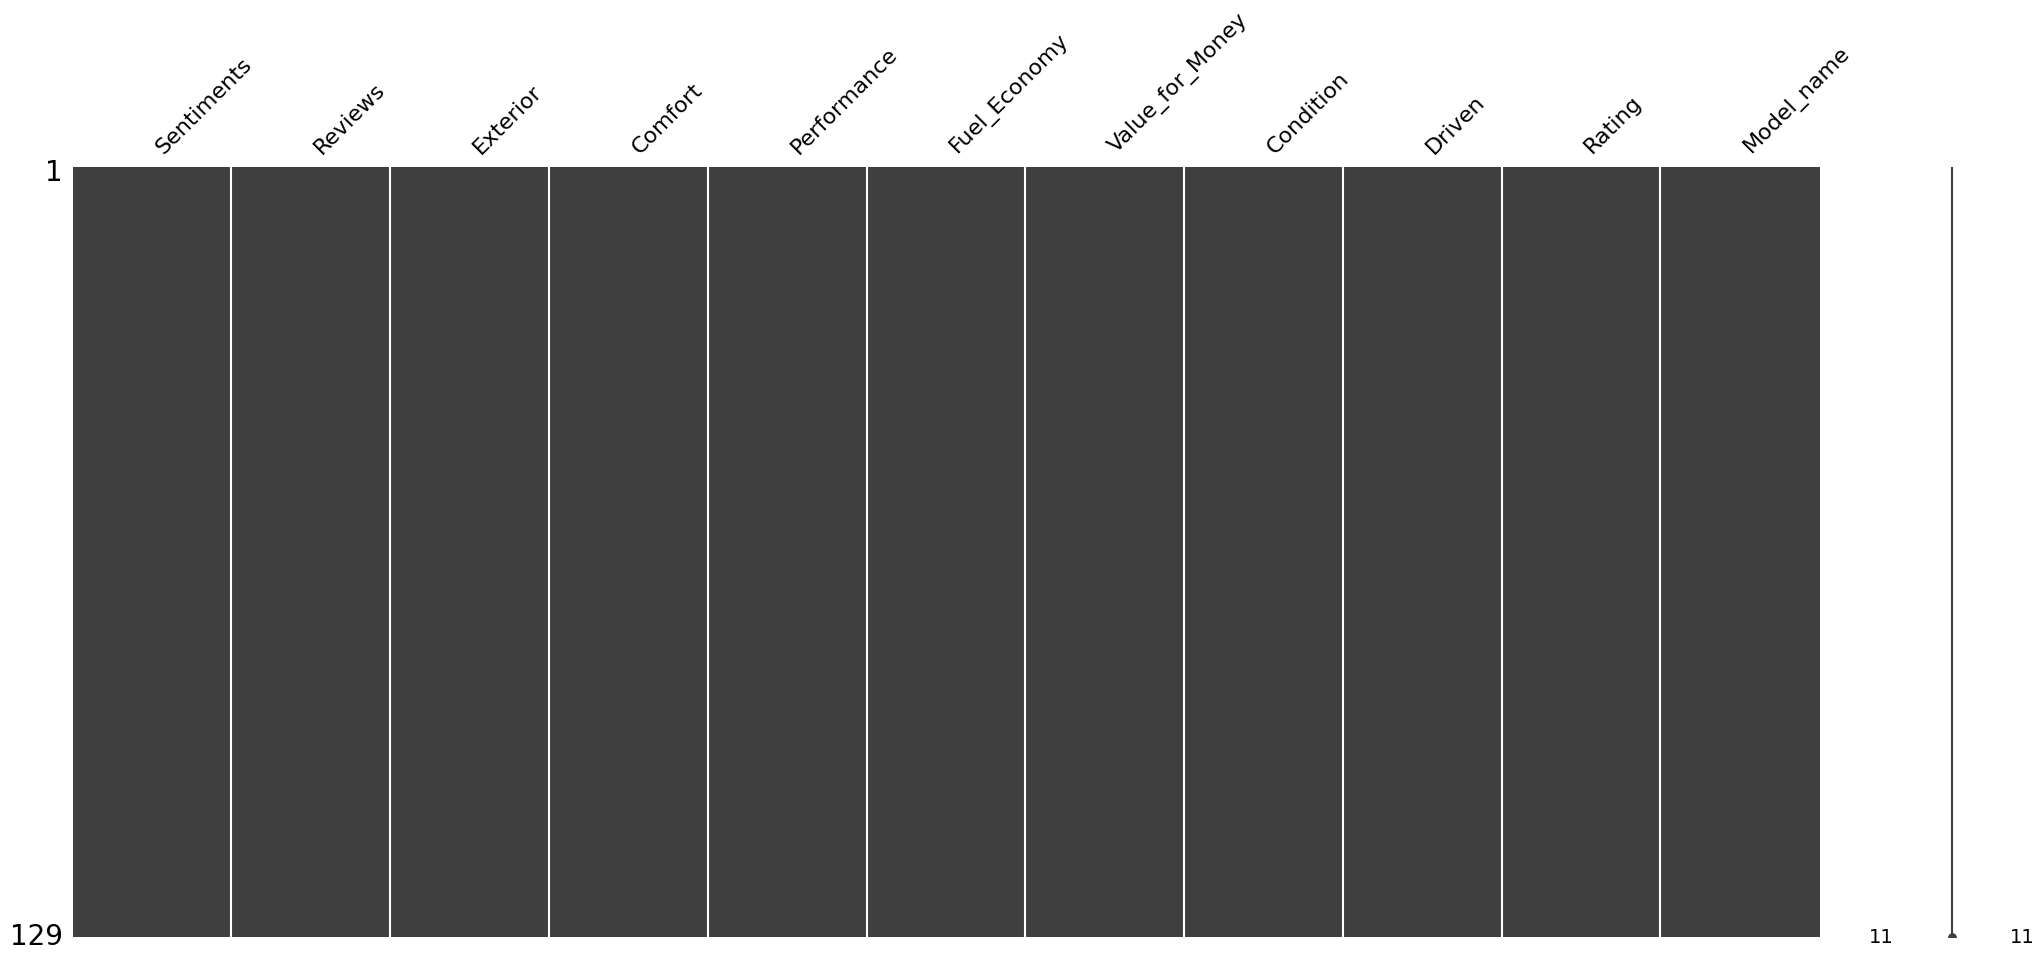

In [12]:
msno.matrix(data_cw)

<Axes: >

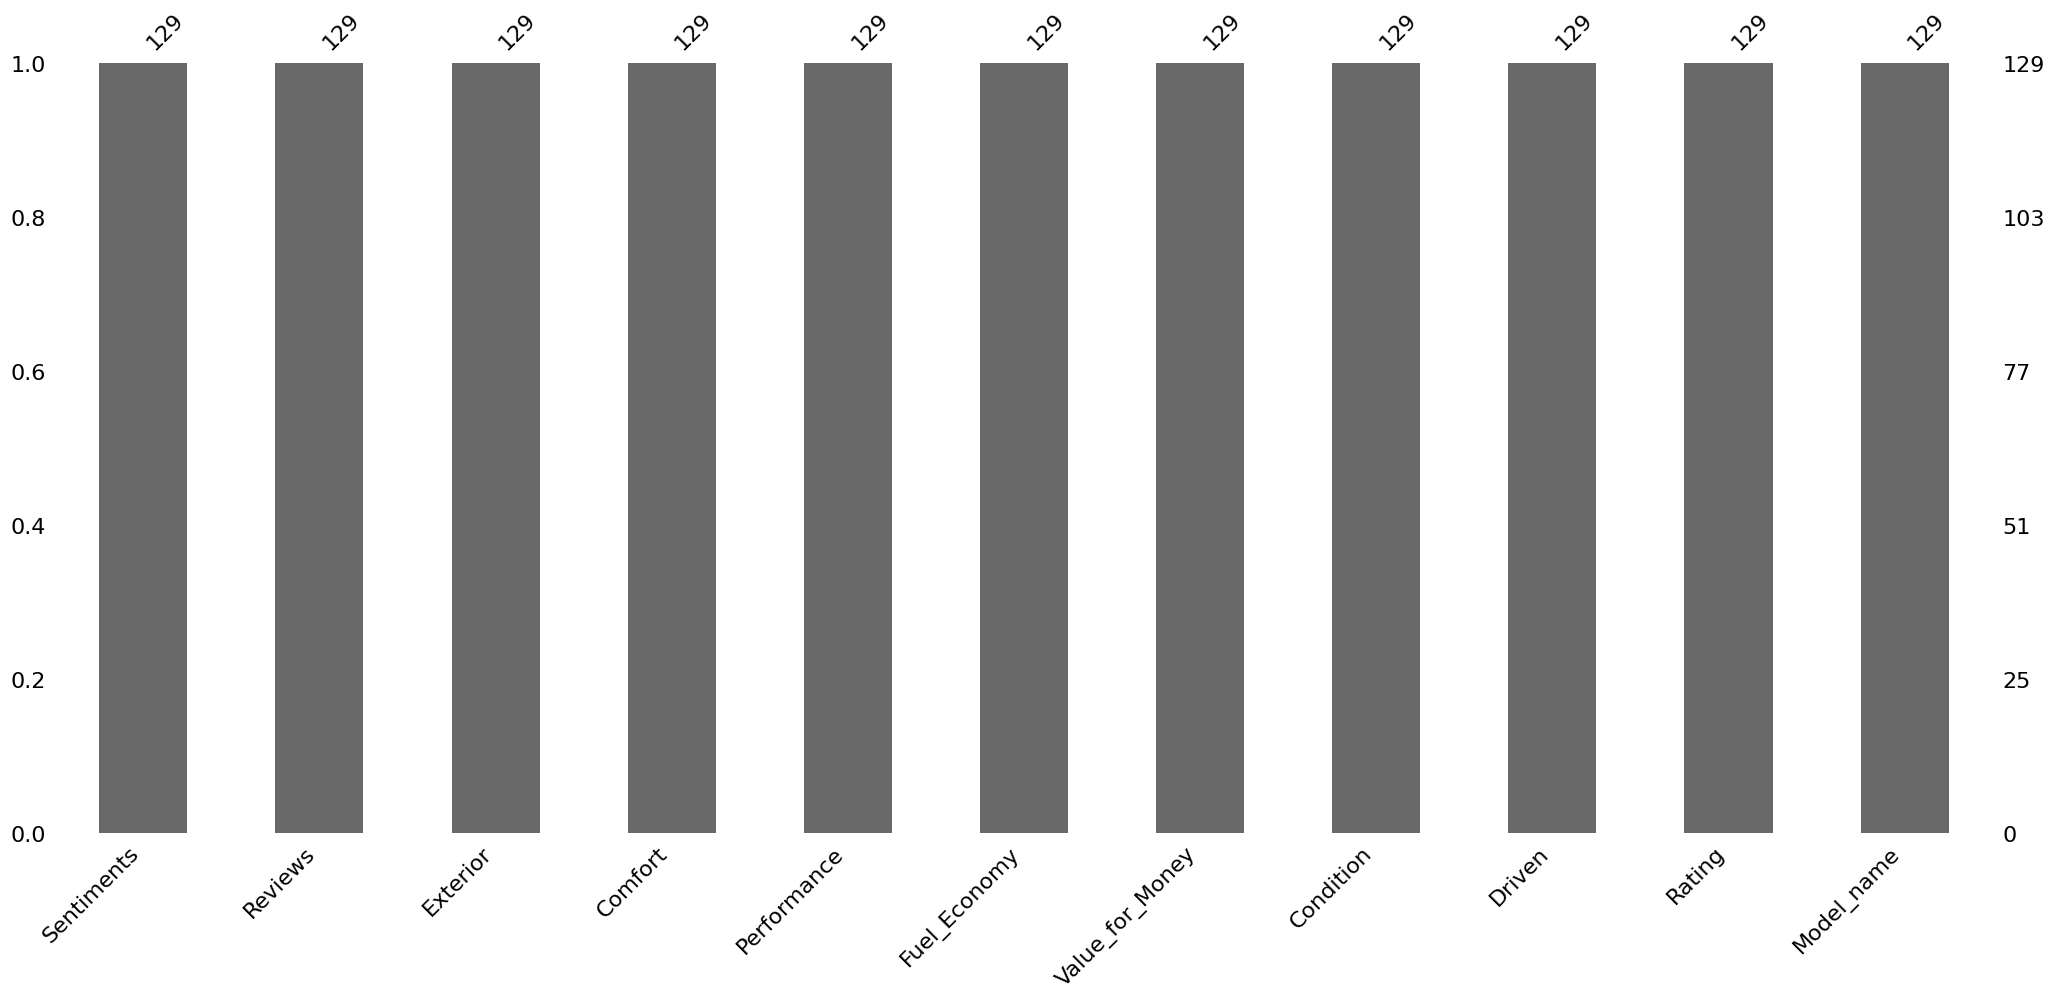

In [13]:
msno.bar(data_cw)

In [14]:
data_cw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Sentiments       129 non-null    object
 1   Reviews          129 non-null    object
 2   Exterior         129 non-null    int64 
 3   Comfort          129 non-null    int64 
 4   Performance      129 non-null    int64 
 5   Fuel_Economy     129 non-null    int64 
 6   Value_for_Money  129 non-null    int64 
 7   Condition        129 non-null    object
 8   Driven           129 non-null    object
 9   Rating           129 non-null    int64 
 10  Model_name       129 non-null    object
dtypes: int64(6), object(5)
memory usage: 11.2+ KB


In [15]:
data_cw['Sentiments'].value_counts()

Sentiments
Positive    103
Nuetral      14
Negative     12
Name: count, dtype: int64

In [16]:
data_cw.head()

,Sentiments,Reviews,Exterior,Comfort,Performance,Fuel_Economy,Value_for_Money,Condition,Driven,Rating,Model_name
0,Positive,Superb car like as fantastic as petroleum car....,5,4,5,5,5,New,Few hundred kilometers,5,hyundai kona
1,Negative,"Anti national, worst service, worst customer c...",1,1,1,1,1,New,Haven't driven it,0,hyundai kona
2,Positive,Super happy with it. The car is too good,4,5,5,5,4,New,Few thousand kilometers,5,hyundai kona
3,Positive,"Pretty good car, smooth as a glider fast car, ...",5,5,5,5,5,New,Few thousand kilometers,5,hyundai kona
4,Nuetral,Price difference between petrol and electronic...,4,4,5,3,2,Not Purchased,Haven't driven it,3,hyundai kona


In [17]:
data_segment = data_cw[['Comfort','Performance','Fuel_Economy','Value_for_Money','Rating']].copy()

In [18]:
data_segment.head()

,Comfort,Performance,Fuel_Economy,Value_for_Money,Rating
0,4,5,5,5,5
1,1,1,1,1,0
2,5,5,5,4,5
3,5,5,5,5,5
4,4,5,3,2,3


In [19]:
data_segment.mean()

Comfort            4.457364
Performance        4.457364
Fuel_Economy       4.457364
Value_for_Money    4.162791
Rating             4.341085
dtype: float64

In [20]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_segment)
data_scaled

array([[-0.47817583,  0.5031936 ,  0.51717236,  0.62485186,  0.47619234],
       [-3.61468512, -3.20606211, -3.29512674, -2.36055147, -3.13726721],
       [ 0.56732726,  0.5031936 ,  0.51717236, -0.12149897,  0.47619234],
       [ 0.56732726,  0.5031936 ,  0.51717236,  0.62485186,  0.47619234],
       [-0.47817583,  0.5031936 , -1.38897719, -1.61420064, -0.96919148],
       [-1.52367893,  0.5031936 ,  0.51717236, -0.12149897,  0.47619234],
       [ 0.56732726,  0.5031936 ,  0.51717236,  0.62485186,  0.47619234],
       [ 0.56732726,  0.5031936 ,  0.51717236,  0.62485186,  0.47619234],
       [ 0.56732726,  0.5031936 ,  0.51717236,  0.62485186,  0.47619234],
       [ 0.56732726,  0.5031936 ,  0.51717236,  0.62485186,  0.47619234],
       [ 0.56732726,  0.5031936 ,  0.51717236,  0.62485186,  0.47619234],
       [ 0.56732726,  0.5031936 ,  0.51717236,  0.62485186,  0.47619234],
       [ 0.56732726,  0.5031936 ,  0.51717236,  0.62485186,  0.47619234],
       [-0.47817583,  0.5031936 ,  0.5

In [21]:
pca = PCA(random_state = 42)
data_pca = pca.fit_transform(data_scaled)

In [22]:
df_pca = pd.DataFrame(data_pca, columns = [f'PC{x +1}' for x in range(len(data_segment.columns))])

In [23]:
df_pca.head()

,PC1,PC2,PC3,PC4,PC5
0,-0.729566,-0.297244,-0.561160,0.518616,-0.402541
1,6.985996,-0.272338,-0.754481,-0.209035,-0.355034
2,-0.871378,0.126312,0.503602,0.222256,0.076061
3,-1.202224,0.017902,-0.085350,-0.073473,0.037221
4,1.728078,0.013010,1.295708,-0.300725,-1.095616


In [24]:
pca_summary = pd.DataFrame({'Standard Deviation':df_pca.std(),
                           'Proportion of Variance': pca.explained_variance_ratio_,
                           'Cumultive Proportion': pca.explained_variance_ratio_.cumsum()})

In [25]:
pca_summary

,Standard Deviation,Proportion of Variance,Cumultive Proportion
PC1,1.996304,0.790867,0.790867
PC2,0.620012,0.076287,0.867154
PC3,0.540936,0.058069,0.925223
PC4,0.465089,0.042926,0.968149
PC5,0.400623,0.031851,1.000000


In [26]:
factor_loadings = pd.DataFrame(pca.components_.T, columns=df_pca.columns, index=data_segment.columns)
factor_loadings.style.background_gradient(cmap = 'Greens_r')

,PC1,PC2,PC3,PC4,PC5
Comfort,-0.452087,0.301430,0.455101,-0.566319,0.420623
Performance,-0.467033,-0.007212,0.314296,0.007745,-0.826430
Fuel_Economy,-0.441629,0.574344,-0.189834,0.638160,0.178347
Value_for_Money,-0.443284,-0.145254,-0.789109,-0.396233,-0.052039
Rating,-0.431232,-0.747073,0.188074,0.339078,0.324922


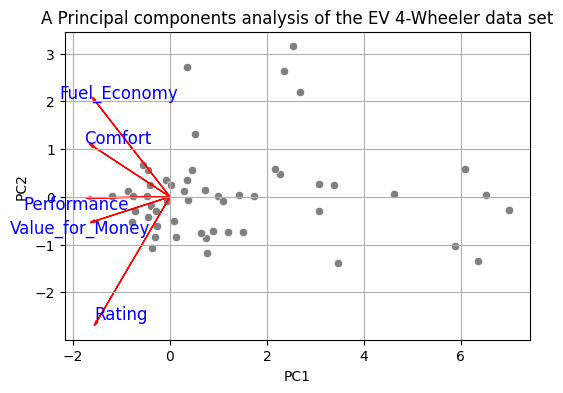

In [27]:
fig, ax = plt.subplots(figsize=(6, 4))

index_names = factor_loadings.index

# Plot data points
sns.scatterplot(df_pca, x = 'PC1', y = 'PC2', color = 'grey', ax=ax)

# Plot arrows from centroid to provided coordinates with index names
for i in range(len(factor_loadings)):
    # Calculate position for text label
    text_x = factor_loadings['PC1'][i] * 3.5
    text_y = factor_loadings['PC2'][i] * 3.5
    # Add a small offset to avoid overlapping
    if i % 2 == 0:
        text_x += 0.5
        text_y += 0.2
    else:
        text_x -= 0.3
        text_y -= 0.1
    plt.arrow(0, 0, factor_loadings['PC1'][i] * 3.5, factor_loadings['PC2'][i] * 3.5, head_width=0.05, head_length=0.1, fc='red', ec='red')
    plt.text(text_x, text_y, index_names[i], fontsize=12, ha='center', color='blue', va='center_baseline')

# Set labels and legend
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('A Principal components analysis of the EV 4-Wheeler data set')
plt.grid(True)
plt.show()

In [28]:
data_km28 = [KMeans(n_clusters = k, random_state = 42).fit(data_scaled) for k in range(2, 9)]

In [29]:
""" calculates the Within-Cluster-Sum-of-Squares for each k_means clustering model.which represents 
the sum of squared distances of samples to their closest cluster center."""

wcss = [model.inertia_ for model in data_km28]

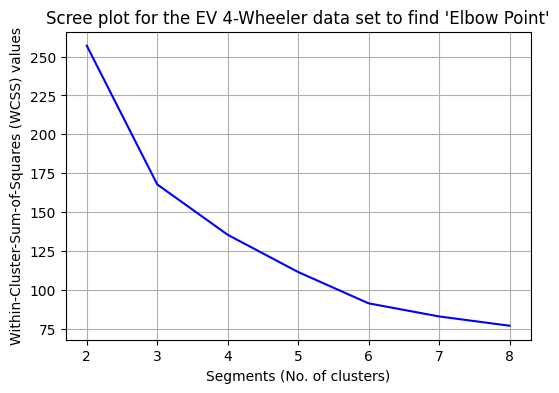

In [30]:
fig = plt.figure(figsize = (6,4))
sns.lineplot(x = list(range(2, 9)), y = wcss, color = 'blue')
plt.xlabel("Segments (No. of clusters)")
plt.ylabel('Within-Cluster-Sum-of-Squares (WCSS) values')
plt.title("Scree plot for the EV 4-Wheeler data set to find 'Elbow Point'")
plt.grid(True)
plt.show()

In [31]:
wcss_diff = pd.DataFrame({'Segments(No. of clusters)':range(2,9),
                          'WCSS Difference': pd.Series(wcss).diff()})
wcss_diff['WCSS Difference'][0] = 0

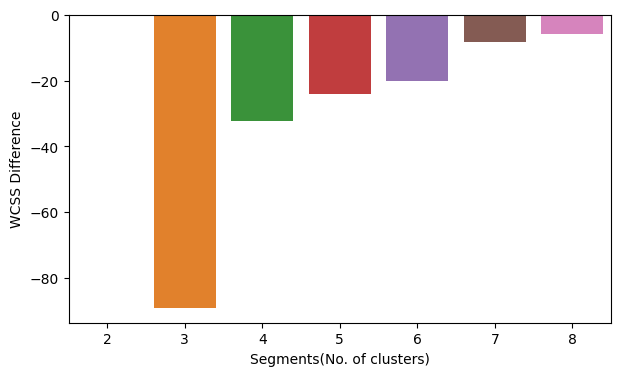

In [32]:
plt.figure(figsize = (7, 4))
sns.barplot(wcss_diff, x = 'Segments(No. of clusters)', y = 'WCSS Difference')
plt.show()

*The decision-making process heavily relied on the insights gained from the scree plot depicted above. It unveiled a noticeable **elbow at four segments**, indicating a substantial decrease in distances. **This pivotal point suggested the optimal number of segments for our analysis**.*

In [33]:
kmeans = data_km28[2]

In [34]:
data_clust = pd.DataFrame(data_scaled, columns = data_segment.columns)
data_clust['cluster'] = kmeans.labels_
data_clust.head()

,Comfort,Performance,Fuel_Economy,Value_for_Money,Rating,cluster
0,-0.478176,0.503194,0.517172,0.624852,0.476192,0
1,-3.614685,-3.206062,-3.295127,-2.360551,-3.137267,3
2,0.567327,0.503194,0.517172,-0.121499,0.476192,0
3,0.567327,0.503194,0.517172,0.624852,0.476192,0
4,-0.478176,0.503194,-1.388977,-1.614201,-0.969191,2


In [35]:
data_pca = df_pca.copy()
data_pca['cluster'] = kmeans.labels_
data_pca.head()

,PC1,PC2,PC3,PC4,PC5,cluster
0,-0.729566,-0.297244,-0.561160,0.518616,-0.402541,0
1,6.985996,-0.272338,-0.754481,-0.209035,-0.355034,3
2,-0.871378,0.126312,0.503602,0.222256,0.076061,0
3,-1.202224,0.017902,-0.085350,-0.073473,0.037221,0
4,1.728078,0.013010,1.295708,-0.300725,-1.095616,2


# Profiling Segments 

In [36]:
data_profile = data_segment.copy()
data_profile['cluster'] = kmeans.labels_
data_profile.head()

,Comfort,Performance,Fuel_Economy,Value_for_Money,Rating,cluster
0,4,5,5,5,5,0
1,1,1,1,1,0,3
2,5,5,5,4,5,0
3,5,5,5,5,5,0
4,4,5,3,2,3,2


In [37]:
columns_segment = data_clust.columns
data_pivot = data_profile[columns_segment].groupby('cluster').mean().T
data_pivot

cluster,0,1,2,3
Comfort,4.847826,3.5,4.20,1.428571
Performance,4.923913,2.9,4.30,1.000000
Fuel_Economy,4.880435,3.6,4.10,1.142857
Value_for_Money,4.913043,2.0,2.90,1.000000
Rating,4.869565,1.9,4.45,0.571429


In [38]:
data_pivot_mean = data_pivot.mean(axis = 1).reset_index()
data_pivot_mean.columns = ['Variable', 'Value']

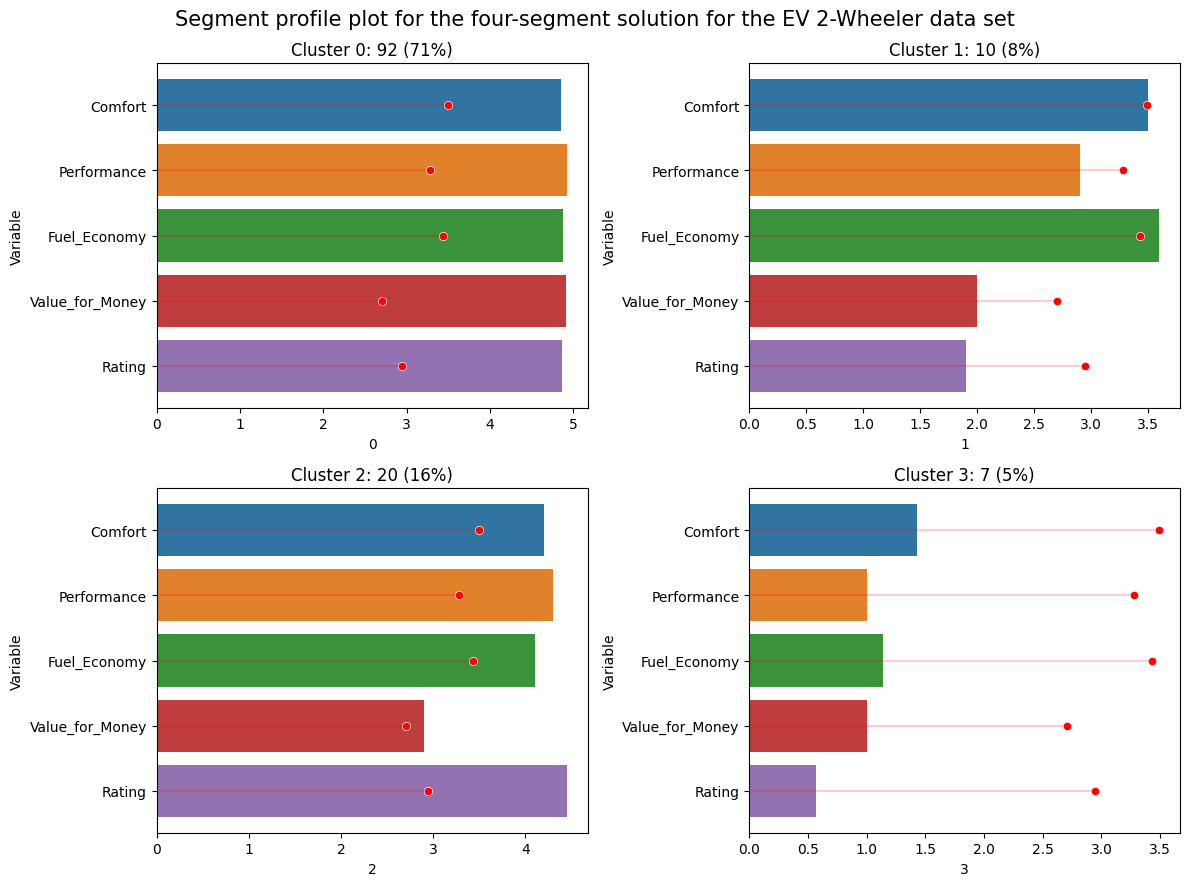

In [39]:
plt.figure(figsize = (12, 9))
for i in range(4):
    plt.subplot(2, 2, i+1)
    sns.barplot(data_pivot, x = i, y = data_pivot.index)
    sns.scatterplot(data_pivot_mean, x = 'Value', y = 'Variable', color = 'red')
    for index, row in data_pivot_mean.iterrows():
        plt.hlines(y=row['Variable'], xmin=0, xmax=row['Value'], colors='red', alpha = 0.2)
    plt.title(f"Cluster {i}: {data_profile['cluster'].value_counts()[i]} ({data_profile['cluster'].value_counts()[i]*100/len(data_profile):.0f}%)")
plt.suptitle("Segment profile plot for the four-segment solution for the EV 2-Wheeler data set", fontsize = 15)
plt.tight_layout()
plt.show()

*The visualization above illustrates the diverse perspectives across different segments. **Segment 0, representing 71% of consumers**, shows a strong appreciation for comfort, performance, fuel economy, value for money, and overall rating. Similarly, **Segment 1, accounting for 8% of consumers**, exhibits high regard for these factors, with a particular emphasis on value for money. **Segment 2, comprising 16% of consumers**, also values comfort, performance, fuel economy, value for money, and rating. However, **Segment 3, representing 5% of consumers**, expresses dissatisfaction across these aspects, indicating the need for improvement to address their concerns. This segmentation sheds light on distinct consumer perceptions, particularly regarding product features and satisfaction levels.*

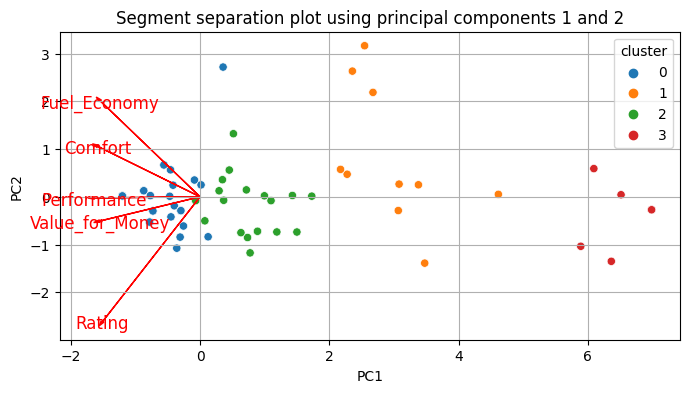

In [40]:
fig, ax = plt.subplots(figsize=(8,4))

# Calculate centroid
index_names = factor_loadings.index

# Plot data points
sns.scatterplot(data_pca, x = 'PC1', y = 'PC2', hue = 'cluster', palette = 'tab10',ax=ax)

# Plot arrows from centroid to provided coordinates with index names
for i in range(len(factor_loadings['PC1'])):
    plt.arrow(0, 0, factor_loadings['PC1'][i] * 3.5, factor_loadings['PC2'][i] * 3.5, head_width=0.05, head_length=0.1, fc='red', ec='red')
    plt.text(factor_loadings['PC1'][i] * 3.5, factor_loadings['PC2'][i]* 3.5, index_names[i], fontsize=12, ha='center', color = 'red', va = 'center_baseline')

# Set labels and legend
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Segment separation plot using principal components 1 and 2')
plt.grid(True)
plt.show()

*The segment separation plot reveals distinct clustering patterns based on principal components 1 and 2. Cluster 0 (blue) and Cluster 2 (green) are densely packed around the origin, indicating balanced attributes without extreme values. Cluster 1 (orange) and Cluster 3 (red) are spread along the PC1 axis, suggesting significant variation in performance and value for money, with Cluster 3 showing the most distinct differentiation. The attribute vectors indicate that fuel economy and comfort are positively correlated with PC2, while performance and value for money are positively correlated with PC1.*

## Describing Segments

In [41]:
data_desc = data_cw.copy()
data_desc['cluster'] = kmeans.labels_

In [42]:
data_desc.columns

Index(['Sentiments', 'Reviews', 'Exterior', 'Comfort', 'Performance',
       'Fuel_Economy', 'Value_for_Money', 'Condition', 'Driven', 'Rating',
       'Model_name', 'cluster'],
      dtype='object')

In [43]:
data_desc.head()

,Sentiments,Reviews,Exterior,Comfort,Performance,Fuel_Economy,Value_for_Money,Condition,Driven,Rating,Model_name,cluster
0,Positive,Superb car like as fantastic as petroleum car....,5,4,5,5,5,New,Few hundred kilometers,5,hyundai kona,0
1,Negative,"Anti national, worst service, worst customer c...",1,1,1,1,1,New,Haven't driven it,0,hyundai kona,3
2,Positive,Super happy with it. The car is too good,4,5,5,5,4,New,Few thousand kilometers,5,hyundai kona,0
3,Positive,"Pretty good car, smooth as a glider fast car, ...",5,5,5,5,5,New,Few thousand kilometers,5,hyundai kona,0
4,Nuetral,Price difference between petrol and electronic...,4,4,5,3,2,Not Purchased,Haven't driven it,3,hyundai kona,2


Sentiments  Negative  Nuetral  Positive
cluster                                
0                  0        4        88
1                  4        4         2
2                  1        6        13
3                  7        0         0


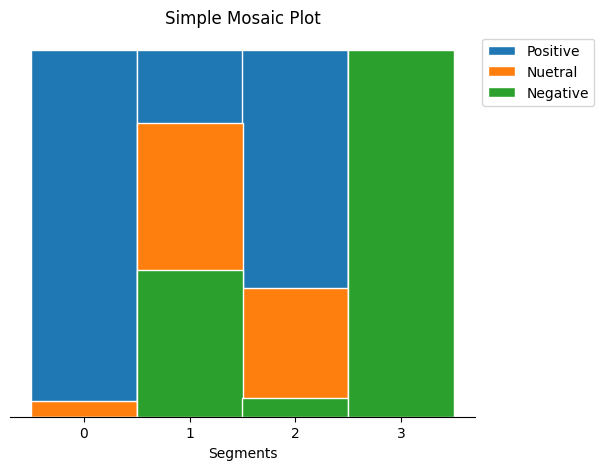

In [44]:
def mosaicplot(df, color_list, figsize=(5,5), barwidth = 1, title = "Simple Mosaic Plot"):
    
    fig, ax = plt.subplots(figsize =figsize)
    
    # Convert to ratio of each row sum and do a cumsum along row
    p_cnt_ratio_df = df.div(df.sum(1), axis =0)
    ratio_cum_df = p_cnt_ratio_df.cumsum(axis=1)
    
    # Get column order.
    col_order = ratio_cum_df.columns.tolist()
        
    x = [str(n) for n in ratio_cum_df.index.tolist()]
    
    # Do the actual plots
    for col, colour in zip(col_order[::-1], color_list):
        plt.bar(x, ratio_cum_df[col], color=colour, edgecolor='white', width=barwidth, label=col)
        
    # Add in legend
    plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
    

    # Configure title and axis
    plt.title(title)
    plt.xlabel("Segments")
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)
    plt.yticks([])
    plt.show()
    
color_list = ['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728', '#9467BD', '#8C564B', '#E377C2', '#7F7F7F']

sentiment_cluster = pd.crosstab(index = data_desc['cluster'], columns = data_desc['Sentiments'])
print(sentiment_cluster)

mosaicplot(sentiment_cluster, color_list[:3], figsize=(6,5), barwidth = 1)

*The mosaic plot below highlights consumer sentiments across different segments. **Segment 0 is predominantly positive, with very few neutral or negative sentiments**. Segment 1 shows a mix of sentiments, with significant positive, neutral, and negative feedback. Segment 2 has a majority of positive sentiments but also a notable amount of neutral responses. Segment 3 is split, with a substantial portion of both positive and negative sentiments. **This analysis reveals diverse sentiment patterns, indicating varied consumer satisfaction and preferences within each segment**.*

In [45]:
used_cluster = pd.crosstab(index = data_desc['cluster'], columns = data_desc['Condition'])

In [46]:
used_cluster

Condition,New,Not Purchased,Used
cluster,,,
0,49,30,13
1,2,5,3
2,7,10,3
3,5,1,1


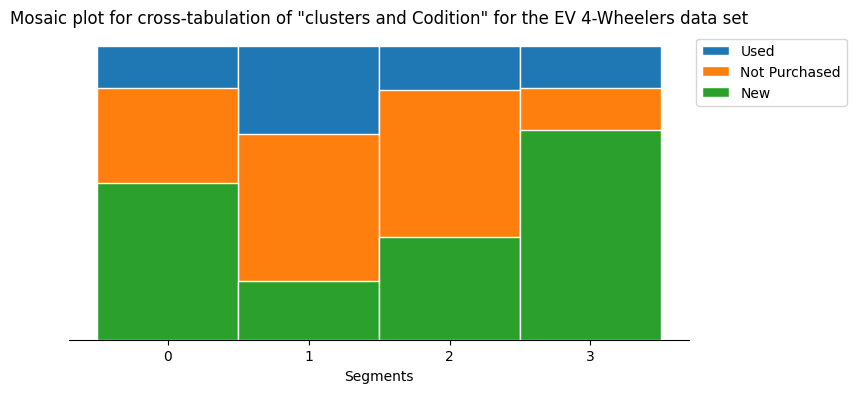

In [47]:
mosaicplot(used_cluster, color_list[:5], figsize=(8,4), barwidth = 1, title = 'Mosaic plot for cross-tabulation of "clusters and Codition" for the EV 4-Wheelers data set' )

In [48]:
owned_cluster = pd.crosstab(index = data_desc['cluster'], columns = data_desc['Driven'])

In [49]:
owned_cluster

Driven,Did a short drive once,Few hundred kilometers,Few thousand kilometers,Haven't driven it,Its my mate since ages
cluster,,,,,
0,26,23,28,14,1
1,4,1,3,2,0
2,6,5,2,6,1
3,1,2,1,3,0


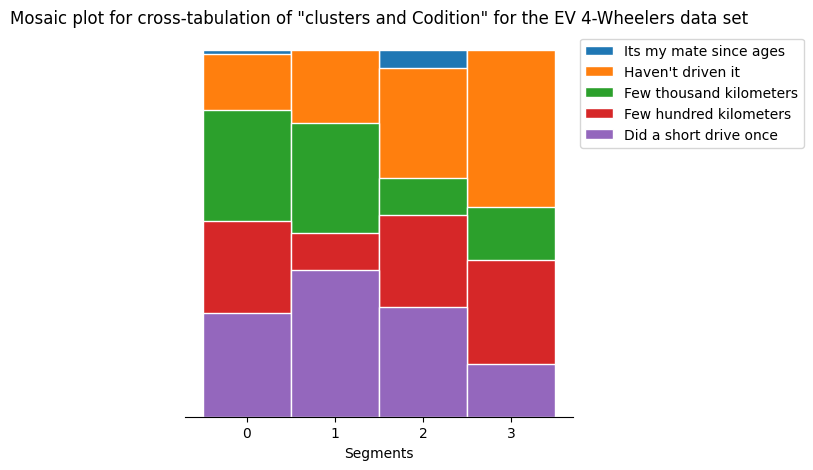

In [50]:
mosaicplot(owned_cluster, color_list[:5], figsize=(5,5), barwidth = 1, title = 'Mosaic plot for cross-tabulation of "clusters and Codition" for the EV 4-Wheelers data set' )

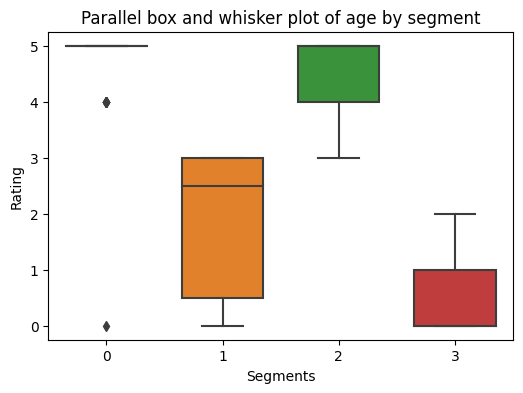

In [51]:
# Number of cluster along the x-axis and rating along the y-axis
plt.figure(figsize = (6,4))
sns.boxplot(data_desc, x= 'cluster', y = 'Rating', palette = 'tab10', width = 0.7)
plt.xlabel("Segments")
plt.ylabel("Rating")
plt.title("Parallel box and whisker plot of age by segment")
plt.savefig("rating.png")
plt.show()

*The parallel box and whisker plot above highlight substantial differences in average ratings among segments. Particularly, consumers in **Segment 3 exhibit dissatisfaction across all perceptions, resulting in lower overall ratings.** This visualization underscores the varying perceptions and satisfaction levels among different segments of consumers.*

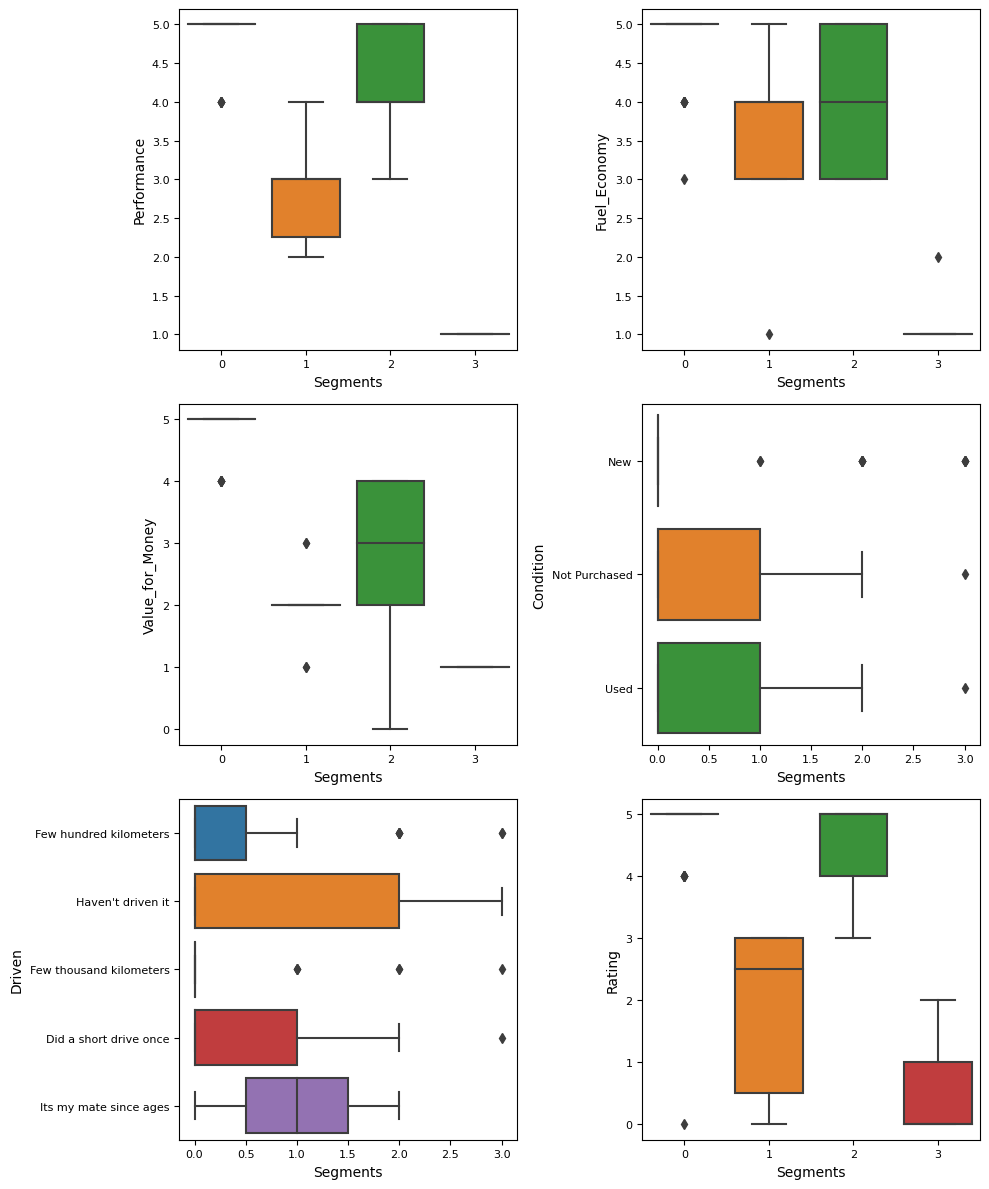

In [52]:
plt.figure(figsize = (10, 12))
for i, col in enumerate(data_desc.columns[-8:-2]):
    plt.subplot(3, 2, i+1)
    sns.boxplot(data_desc, x = 'cluster', y =col)
    plt.xlabel("Segments", fontsize= 10)
    plt.ylabel(col, fontsize = 10)
    plt.xticks(fontsize = 8)
    plt.yticks(fontsize = 8)
plt.tight_layout()
plt.show()

*The analysis of electric vehicle (EV) technical specifications across different segments in India reveals distinct market trends and preferences. **Segment 2 dominates the premium, long-range EV market, achieving high customer satisfaction and indicating a lucrative niche for luxury and long-distance EVs**. In contrast, **Segment 3 targets budget-friendly commuter EVs** but shows lower satisfaction, suggesting areas for enhancing the driving experience. **Segments 0 and 1 focus on affordability**, with varied charging time preferences and mixed satisfaction, highlighting the need to balance cost and performance to boost consumer satisfaction.*